<a href="https://colab.research.google.com/github/christophermalone/DSCI425/blob/main/DSCI425_SegmentedRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmented Regression in R

The handout is a simple example of the use of Segmented Regression.  This analysis will be done using R.

The data that will be used for this example is the Nenana Ice Out data.  The residents near the Nenana River hold a contest each year to predict when the ice in the Nenana River will break up.



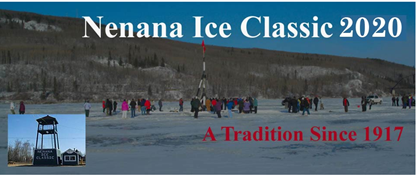



Website: https://www.nenanaakiceclassic.com/

Data Source: https://data.alaska.gov/stories/s/3fi8-3kt6

## Load tidyverse for reading in data / etc.

In [ ]:
library(tidyverse)

## Reading in the data

In [36]:
Nenana <- read_csv("http://www.StatsClass.org/dsci425/Datasets/Nenana.csv")

Rows: 104 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date & Time
dbl (2): Year, DayIntoYear

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Taking a quick look at the data...

In [37]:
head(Nenana)

tail(Nenana)

Year,DayIntoYear,Date & Time
<dbl>,<dbl>,<chr>
1917,120.4795,April 30 at 11:30
1918,131.3983,May 11 at 9:33
1919,123.6066,May 3 at 14:33
1920,132.4490,May 11 at 10:46
1921,131.2795,May 11 at 6:42
1922,132.5559,May 12 at 13:20


Year,DayIntoYear,Date & Time
<dbl>,<dbl>,<chr>
2015,114.6001,Apr 24 at 14:25
2016,114.6520,Apr 23 at 15:39
2017,121.5000,May 01 at 12:00 (noon)
2018,121.5541,May 01 at 13:18
2019,104.0146,April 14 at 00:21
2020,118.5389,April 27 at 13:56


## Plotting the data - add loess smoother to plot

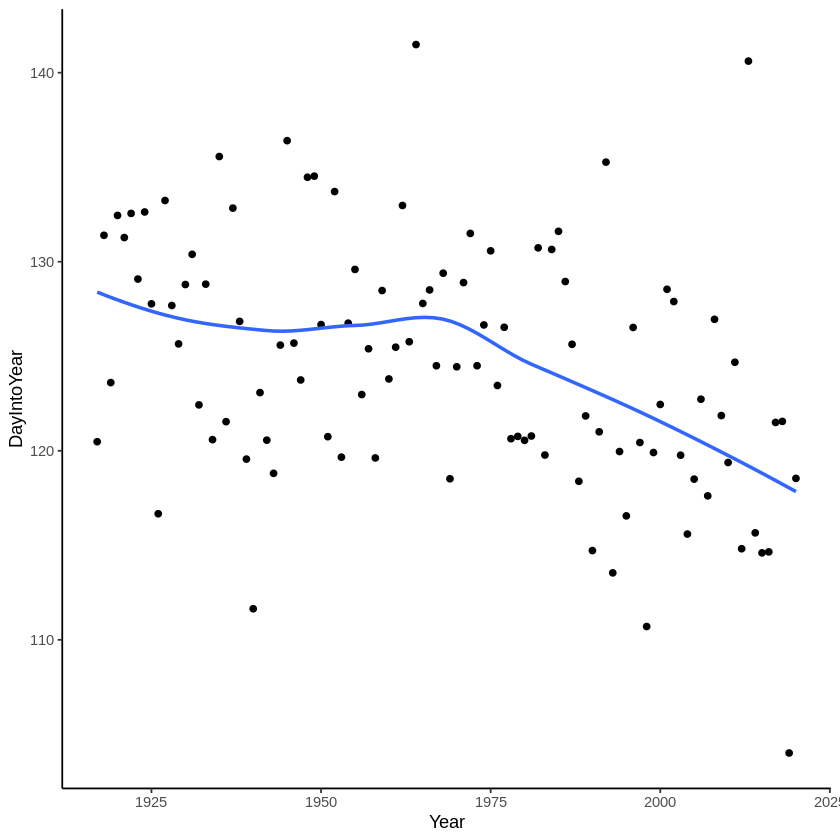

In [12]:
ggplot(Nenana,mapping=aes(x=Year,y=DayIntoYear)) +
  geom_point() +
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) + 
  theme_classic()
  

## The **segmented** package for the Change-Point Regression Analysis



First, install the segmented package and load the package into this R session.

In [38]:
install.packages("segmented")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
library(segmented)

## Start with the standard linear model for DayIntoYear ~ Year

In [31]:
Nenana.lmfit <- lm(DayIntoYear ~ Year, data=Nenana)
summary(Nenana.lmfit)


Call:
lm(formula = DayIntoYear ~ Year, data = Nenana)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.1757  -3.6827  -0.1909   3.8110  19.9008 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 295.42422   38.82757   7.609 1.42e-11 ***
Year         -0.08679    0.01972  -4.401 2.66e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.038 on 102 degrees of freedom
Multiple R-squared:  0.1596,	Adjusted R-squared:  0.1513 
F-statistic: 19.37 on 1 and 102 DF,  p-value: 2.66e-05


Next, use the segmented() function to fit the change-point model. Here 1 change-point is being specified.

In [40]:
Segmented.Fit <- segmented(Nenana.lmfit, seg.Z = ~Year, npsi=1)
#Get a summary of the fit
summary(Segmented.Fit)

Next, getting the predicted values for the change-point regression model

In [34]:
#Getting the predicted value for segmented.fit and adding the predicted to the data.frame
Nenana$Predicted.SegmentedFit <- predict(Segmented.Fit, newdata=Nenana)

Finally, obtaining a scatterplot with the segmented regression model.

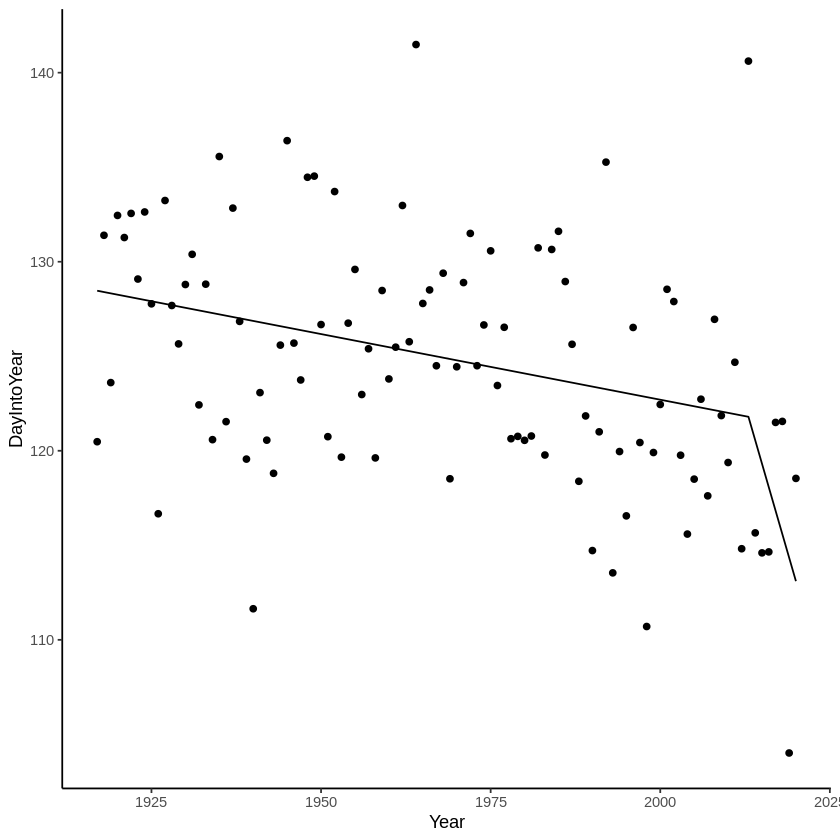

In [35]:
ggplot(Nenana,mapping=aes(x=Year,y=DayIntoYear)) +
  geom_point() +
   geom_line(aes(x=Year, y=Predicted.SegmentedFit)) +
  theme_classic()



---



---
End of Document
